**Import necessary modules and packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
import plotly.express as px


**Load the dataset**

In [3]:
from google.colab import files
uploaded=files.upload()
df=pd.read_excel("ecommerce_customer_dataset.xlsx")

Saving ecommerce_customer_dataset.xlsx to ecommerce_customer_dataset.xlsx


**Display the first few rows of the dataset**

In [4]:
print('Initial Dataset:')
print(df.head())

Initial Dataset:
   Customer_ID   Age Gender  Annual_Income  Spending_Score  \
0            1  56.0   Male        71663.0            96.0   
1            2  69.0   Male        35708.0            27.0   
2            3  46.0   Male       111906.0            63.0   
3            4  32.0   Male        69811.0            96.0   
4            5  60.0   Male        22811.0            68.0   

   Purchase_Frequency  Last_Transaction_Days Preferred_Category  
0                  11                     75            Grocery  
1                   5                    217            Grocery  
2                   1                    277                NaN  
3                   8                    249             Sports  
4                  12                    164           Clothing  


**Handling Missing Values and Duplicates**

In [5]:
'''Missing Value Check'''
print('Check for Missing Values:')
print(df.isnull().sum())
'''Duplicate Check'''
print('Check for Duplicates:')
print(df.duplicated().sum())

Check for Missing Values:
Customer_ID              0
Age                      6
Gender                   0
Annual_Income            5
Spending_Score           5
Purchase_Frequency       0
Last_Transaction_Days    0
Preferred_Category       5
dtype: int64
Check for Duplicates:
5


**Filling Missing Numerical Values With Median and Categorical Values With Mode**

In [6]:
df.fillna({
    'Age': df['Age'].median(),
    'Annual_Income': df['Annual_Income'].median(),
    'Spending_Score': df['Spending_Score'].median(),
    'Purchase_Frequency': df['Purchase_Frequency'].median(),
    'Last_Transaction_Days': df['Last_Transaction_Days'].median(),
    'Preferred_Category': df['Preferred_Category'].mode()[0]
},inplace=True)

**Remove Duplicate Rows**

In [8]:
df.drop_duplicates(inplace=True)
print('\n Missing Values Handled and Duplicates Removed')


 Missing Values Handled and Duplicates Removed


**Data Transformation**

In [9]:
scaler=MinMaxScaler()
df[['Annual_Income','Spending_Score']]=scaler.fit_transform(df[['Annual_Income','Spending_Score']])
std_scaler=StandardScaler()
df['Purchase_Frequency']=std_scaler.fit_transform(df[['Purchase_Frequency']])
# Encoding categorical variables
# One-Hot Encoding for Gender
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)
# Label Encoding for Preferred_Category
le=LabelEncoder()
df['Preferred_Category']=le.fit_transform(df['Preferred_Category'])
print('\n Data Transformantion Completed')


 Data Transformantion Completed


**Feature Engineering**

In [10]:
# Creating Customer Loyalty Score
def loyalty_score(row):
  if row['Spending_Score']>0.7 and row['Purchase_Frequency']>1:
    return 'High'
  elif row['Spending_Score']>0.4:
    return 'Medium'
  else:
    return 'Low'
df['Loyalty_Score']=df.apply(loyalty_score,axis=1)
# Binning customer into income levels
df['Income_Level']=pd.cut(df['Annual_Income'],bins=[0,0.3,0.7,1],labels=['Low','Medium','High'])
# Creating engagement metric
def engagement_status(row):
  if row['Last_Transaction_Days']<30:
    return 'Engaged'
  elif row['Last_Transaction_Days']<90:
    return 'Dormant'
  else:
    return 'Churned'
df['Engagement_Status']=df.apply(engagement_status,axis=1)
print('\n Feature Engineering Completed')


 Feature Engineering Completed


**Data Visualization**

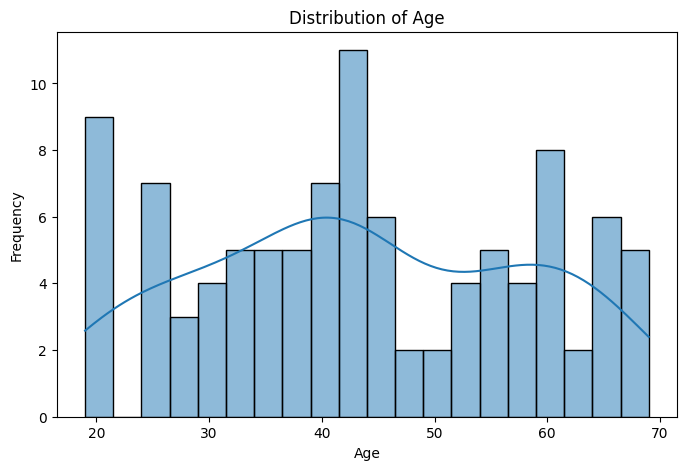

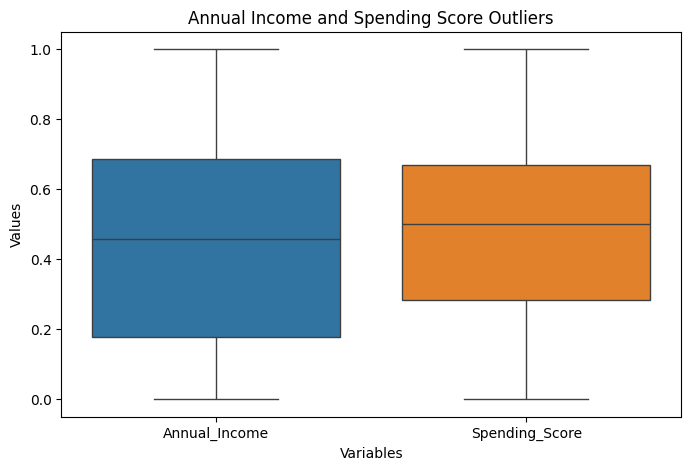

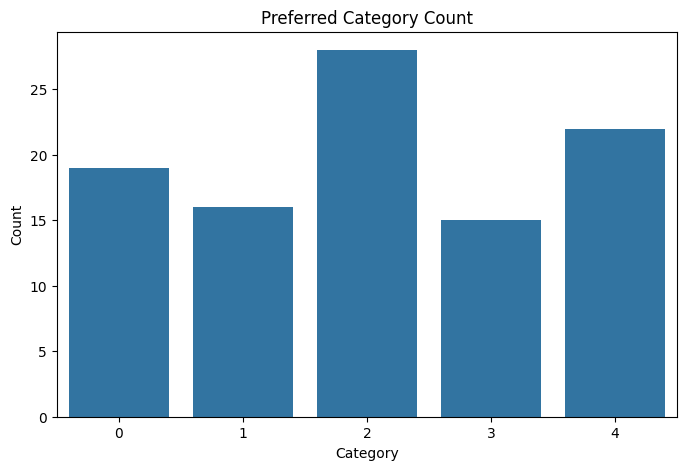



Bivariate Analysis


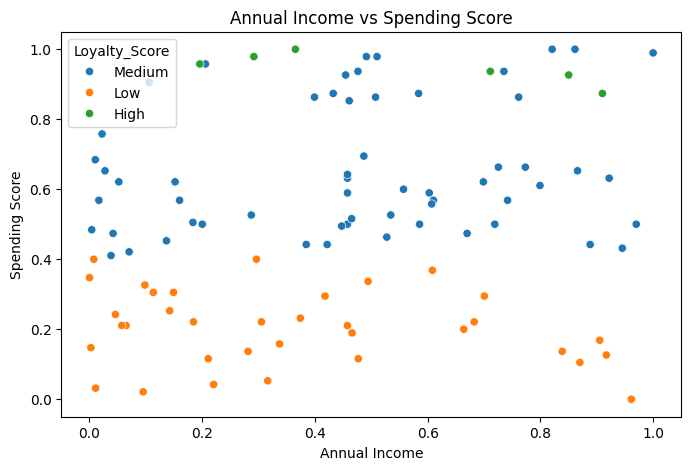



Correlation HeatMap


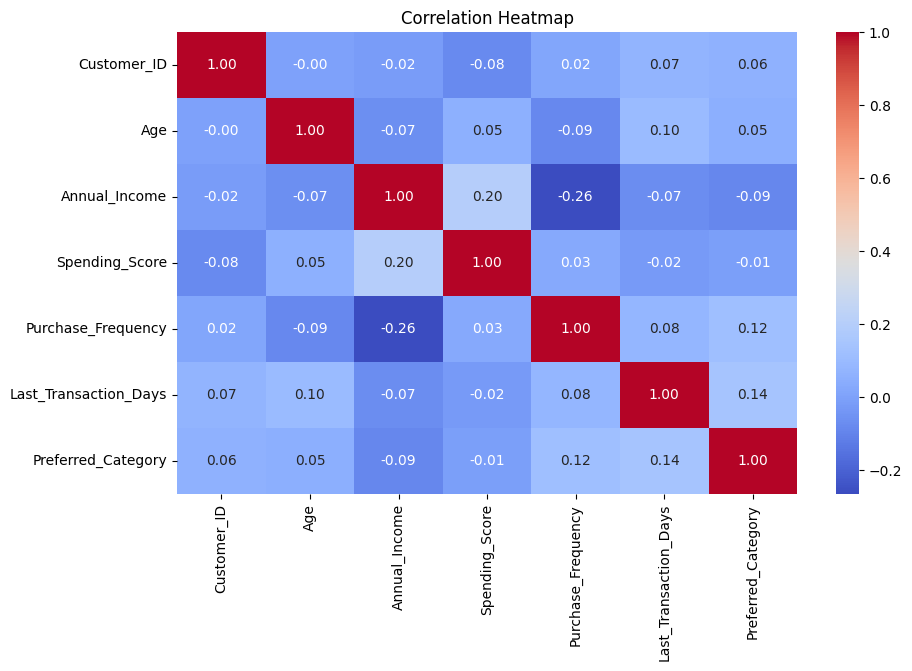



Multivariate Analysis


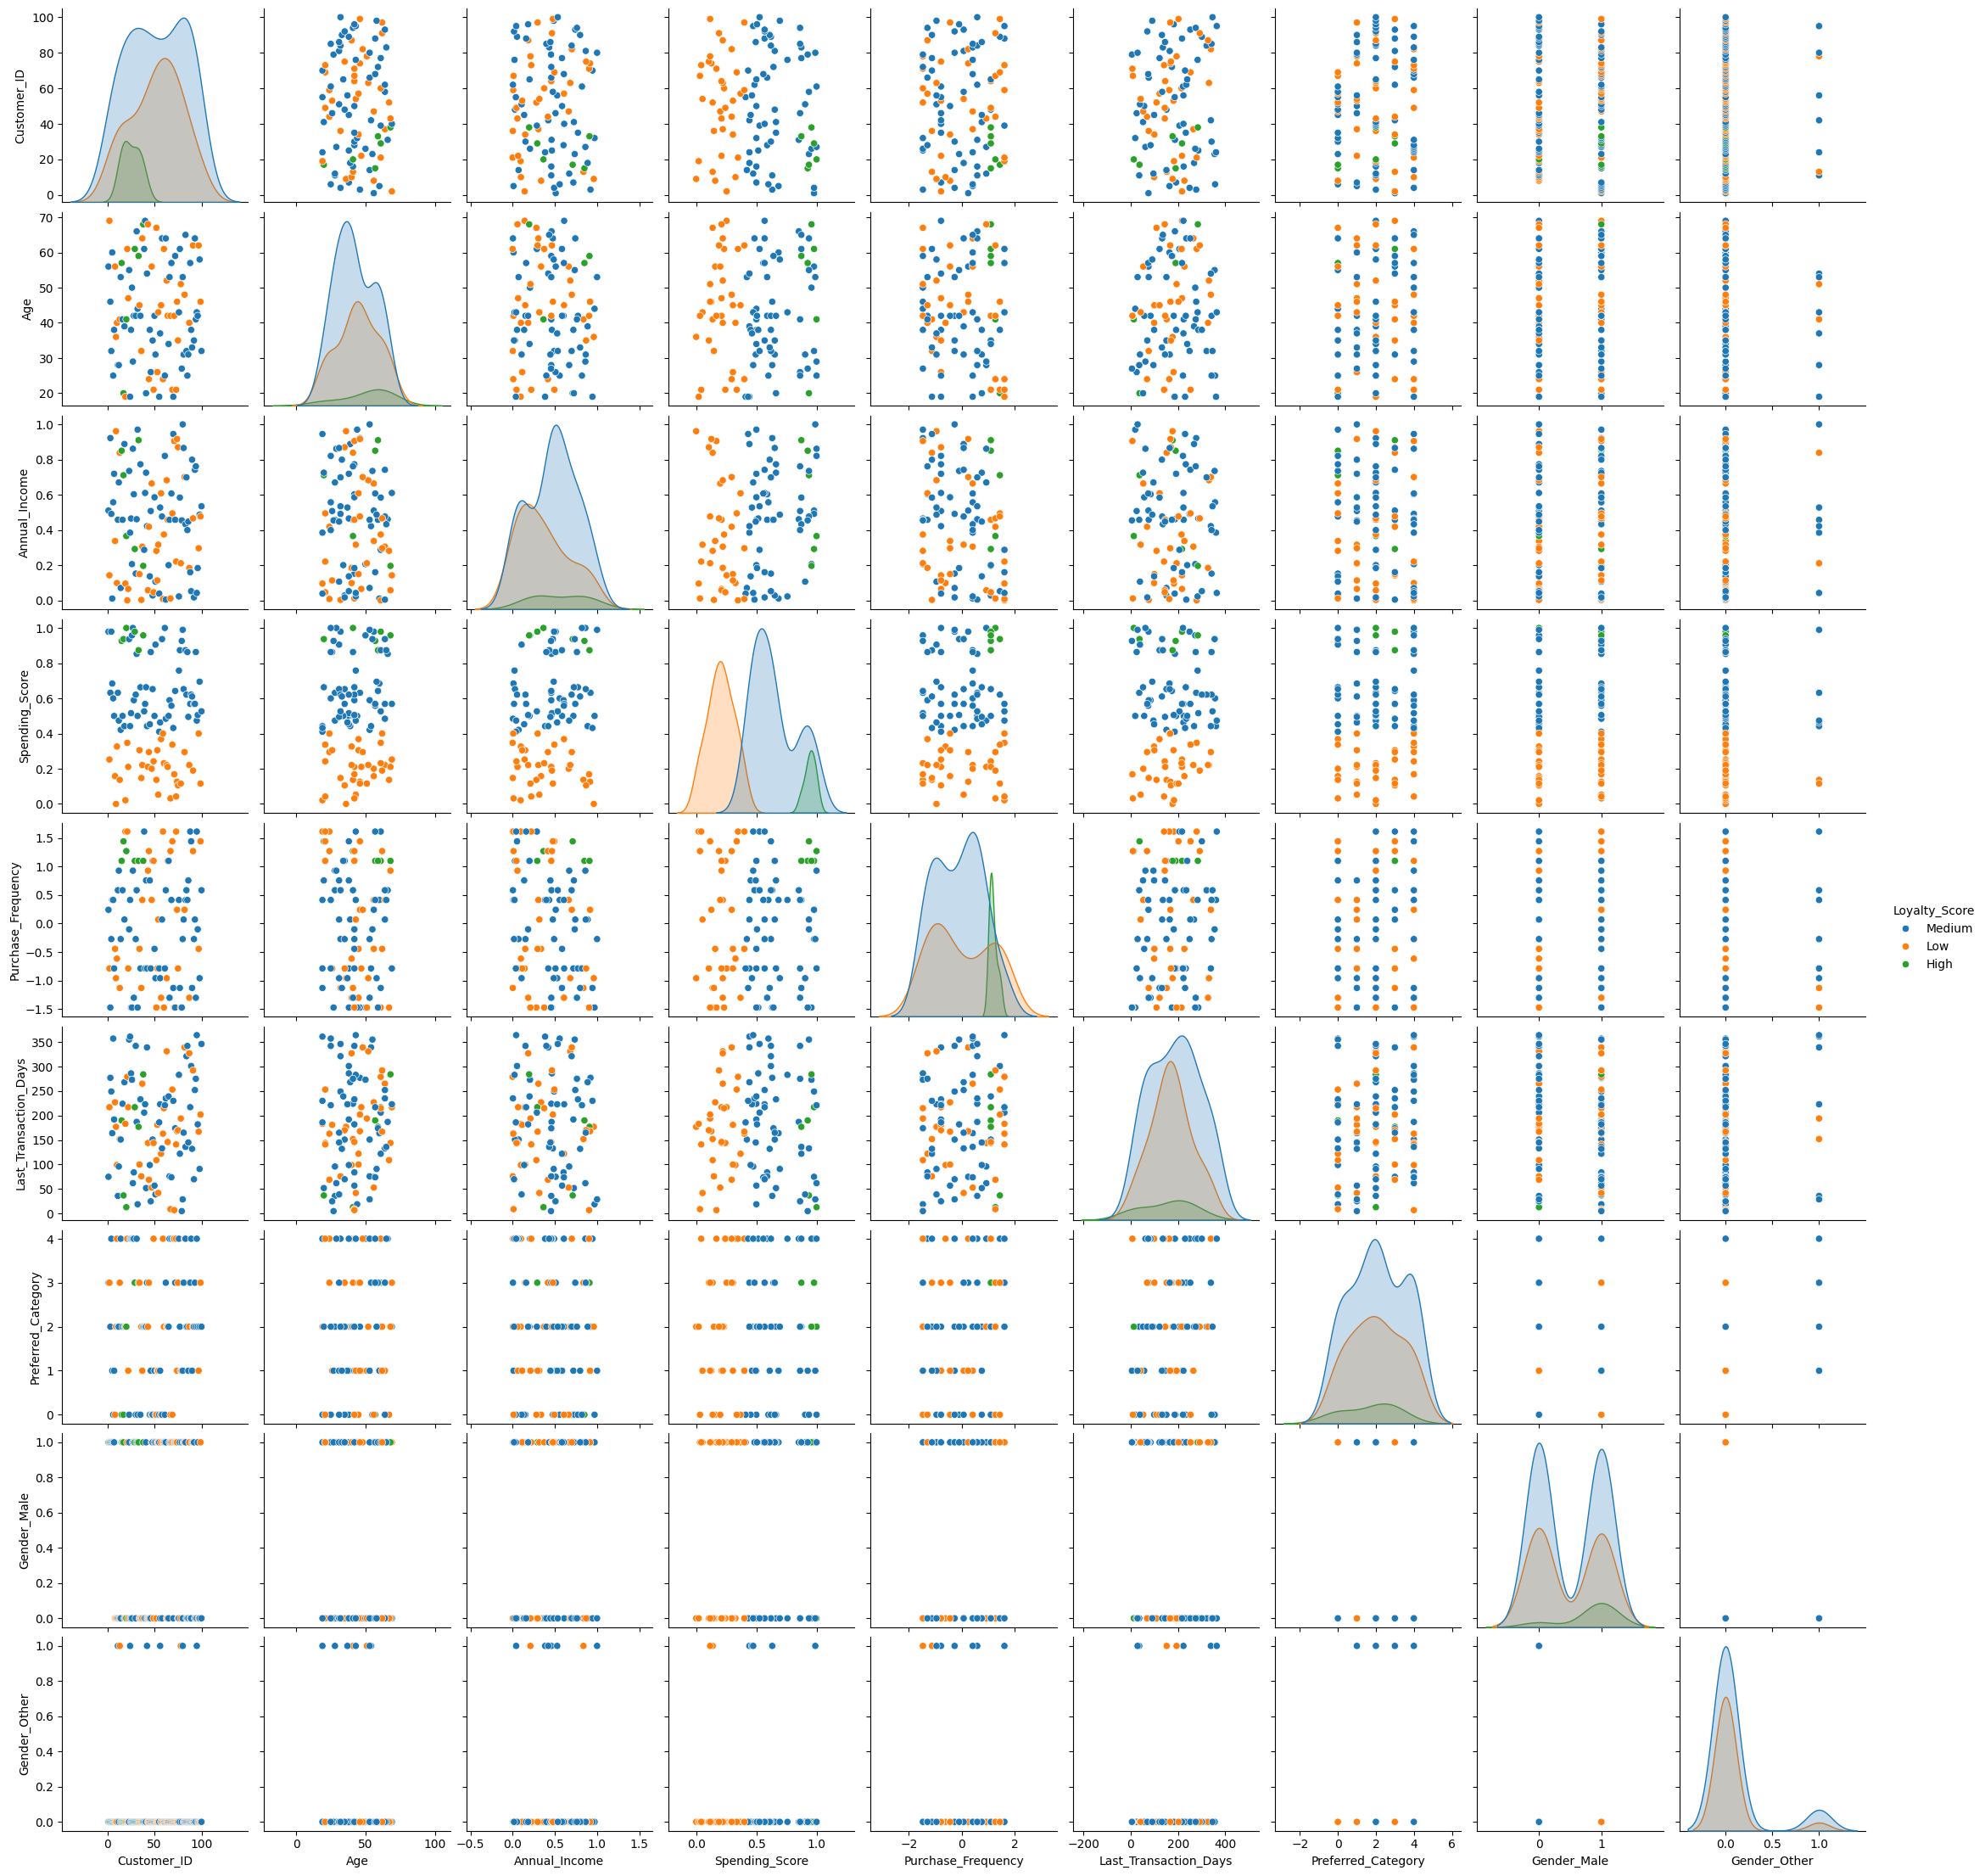

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'],bins=20,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print('\n')
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Annual_Income','Spending_Score']])
plt.title('Annual Income and Spending Score Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()
print('\n')
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Preferred_Category'])
plt.title('Preferred Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
print('\n')
# Bivariate Analysis
print('Bivariate Analysis')
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'],y=df['Spending_Score'],hue=df['Loyalty_Score'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
print('\n')
# Correlation HeatMap
print('Correlation HeatMap')
plt.figure(figsize=(10, 6))
numerical_df=df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print('\n')
# Multivariate Analysis
print('Multivariate Analysis')
sns.pairplot(df,hue='Loyalty_Score')
plt.show()
print('\n')


**Customer Segmentation Insights**

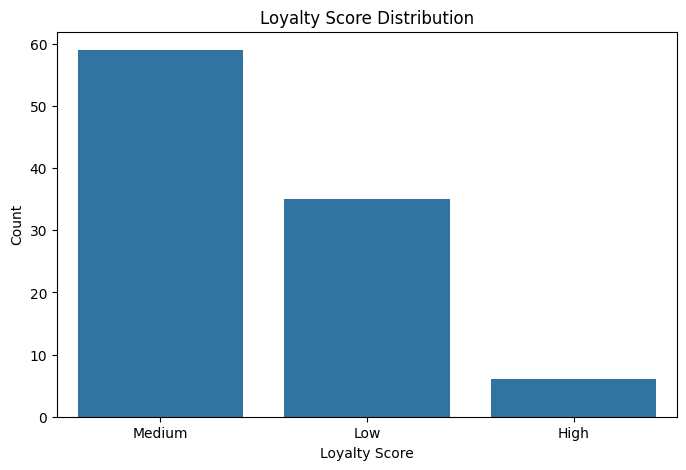

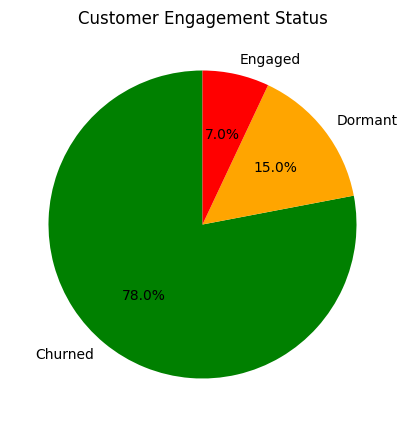

In [18]:
# Loyalty Score Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Loyalty_Score'])
plt.title('Loyalty Score Distribution')
plt.xlabel('Loyalty Score')
plt.ylabel('Count')
plt.show()
print('\n')

# Engagement Status Pie Chart
plt.figure(figsize=(8, 5))
engagement_counts=df['Engagement_Status'].value_counts()
plt.pie(engagement_counts,labels=engagement_counts.index,autopct='%1.1f%%',startangle=90,colors=['green','orange','red'])
plt.title('Customer Engagement Status')
plt.show()
print('\n')

**Interactive Visualization with Plotly**

In [19]:
fig=px.scatter(df,x='Annual_Income',y='Spending_Score',color='Loyalty_Score',hover_data=['Customer_ID','Age','Preferred_Category'],title='Annual Income vs Spending Score')
fig.show()
print('\n')

**All** **Tasks** **Completed** **Successfully**

In [24]:
df.to_csv('Final_Ecommerce_Dataset.csv',index=False)
files.download('Final_Ecommerce_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>